## Rotate an image and crop

Here's the kind of image we're dealing with:

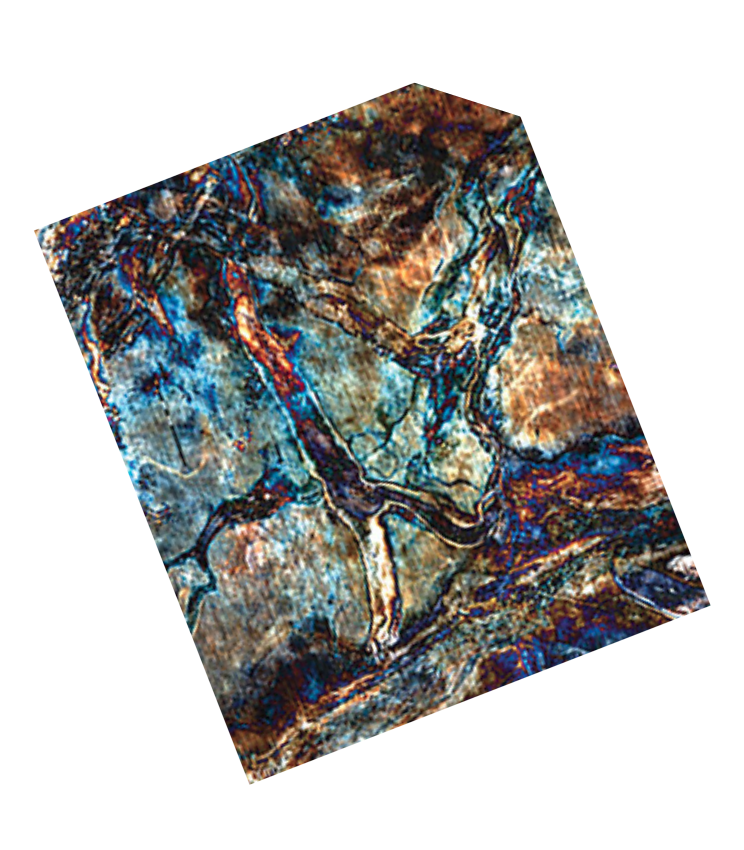

In [17]:
import IPython.display as ipd

ipd.Image(filename='data/specd.png', width=300)

We'd like to rotate it and crop down to the data area.

In [27]:
import numpy as np
from PIL import Image
from skimage.filters import threshold_triangle

def bbox(img):
    """
    Find the min and max x and y coordinates of data-ish pixels.
    """
    ima = np.asarray(img)
    binary = ima > threshold_triangle(ima)
    rect = np.where(~binary)
    xmax, xmin = rect[1].max(), rect[1].min()
    ymax, ymin = rect[0].max(), rect[0].min()
    return xmin, ymin, xmax, ymax

In [28]:
def find_angle(img):
    """
    Scan the angles to find the one that results in minimal pixel area.
    """
    areas = []
    for a in range(1, 90):
        img = img.rotate(-1, fillcolor='white')
        xmin, ymin, xmax, ymax = bbox(img)
        area = (xmax-xmin) * (ymax-ymin)
        areas.append(area)
            
    return areas

In [29]:
def rectify_image(infile, outfile=None, scan=True, adjust=0, greyscale=False, background='white'):
    """
    Read a data file, then find the optimal rotation angle,
    then crop down to the data area. Optionally save it.
    Rotations are clockwise.
    
    Args
        infile (str): The data file to read.
        outfile (str): The file to save the result to. Optional.
        scan (bool): Whether to scan angles. If False, the
            rotation will only come from the adjust argument.
        adjust (float): If the result is not quite straight,
            you can add a small amount extra. If scan is False,
            then this will be used as the rotation angle.
        greyscale (bool): If you want a greyscale image back.
        background (str): The color to fill in during rotation.
            Should match the background colour of the image.
    
    Returns
        img. A PIL Image object. Use np.asarray() on this if 
            you want a NumPy array instead.
    """
    im = Image.open(infile)
    img = im.convert('L')
    
    if scan:
        areas = find_angle(img)
        angle = np.argmin(areas)
    else:
        angle = 0
    
    if adjust is None:
        adjust = 0
        
    if greyscale:
        im = img.copy()
        
    im_new = im.rotate(-angle+adjust, fillcolor=background)
    im_new = im_new.crop(bbox(im_new))
    
    if outfile:
        im_new.save(fname)
    return im_new

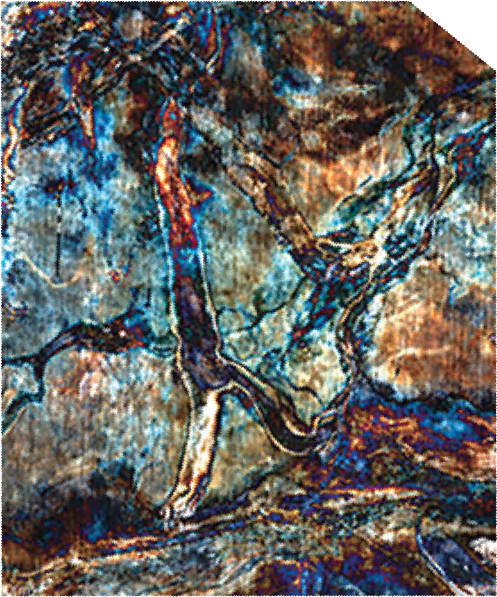

In [30]:
rectify_image('data/specd.png', adjust=-1.2)